In [1]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
train_file_path = "../data/train/X_train.csv"
y_file_path = "../data/train/y_train.csv"
df = pd.read_csv(y_file_path)
# df = df.drop()
df.head()

,date,label
0,2017-01-04,1.3315
1,2017-01-11,1.3250
2,2017-01-18,1.3099
3,2017-01-25,1.3088
4,2017-02-01,1.3074


In [23]:
arima_model = ARIMA(endog=df["label"], order=(1, 1, 10))
results = arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  label   No. Observations:                 1949
Model:                ARIMA(1, 1, 10)   Log Likelihood                4574.772
Date:                Sun, 06 Nov 2022   AIC                          -9125.544
Time:                        15:36:14   BIC                          -9058.649
Sample:                             0   HQIC                         -9100.948
                               - 1949                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0507      2.107     -0.024      0.981      -4.180       4.079
ma.L1          0.0954      2.108      0.045      0.964      -4.037       4.228
ma.L2         -0.0161      0.098     -0.165      0.8

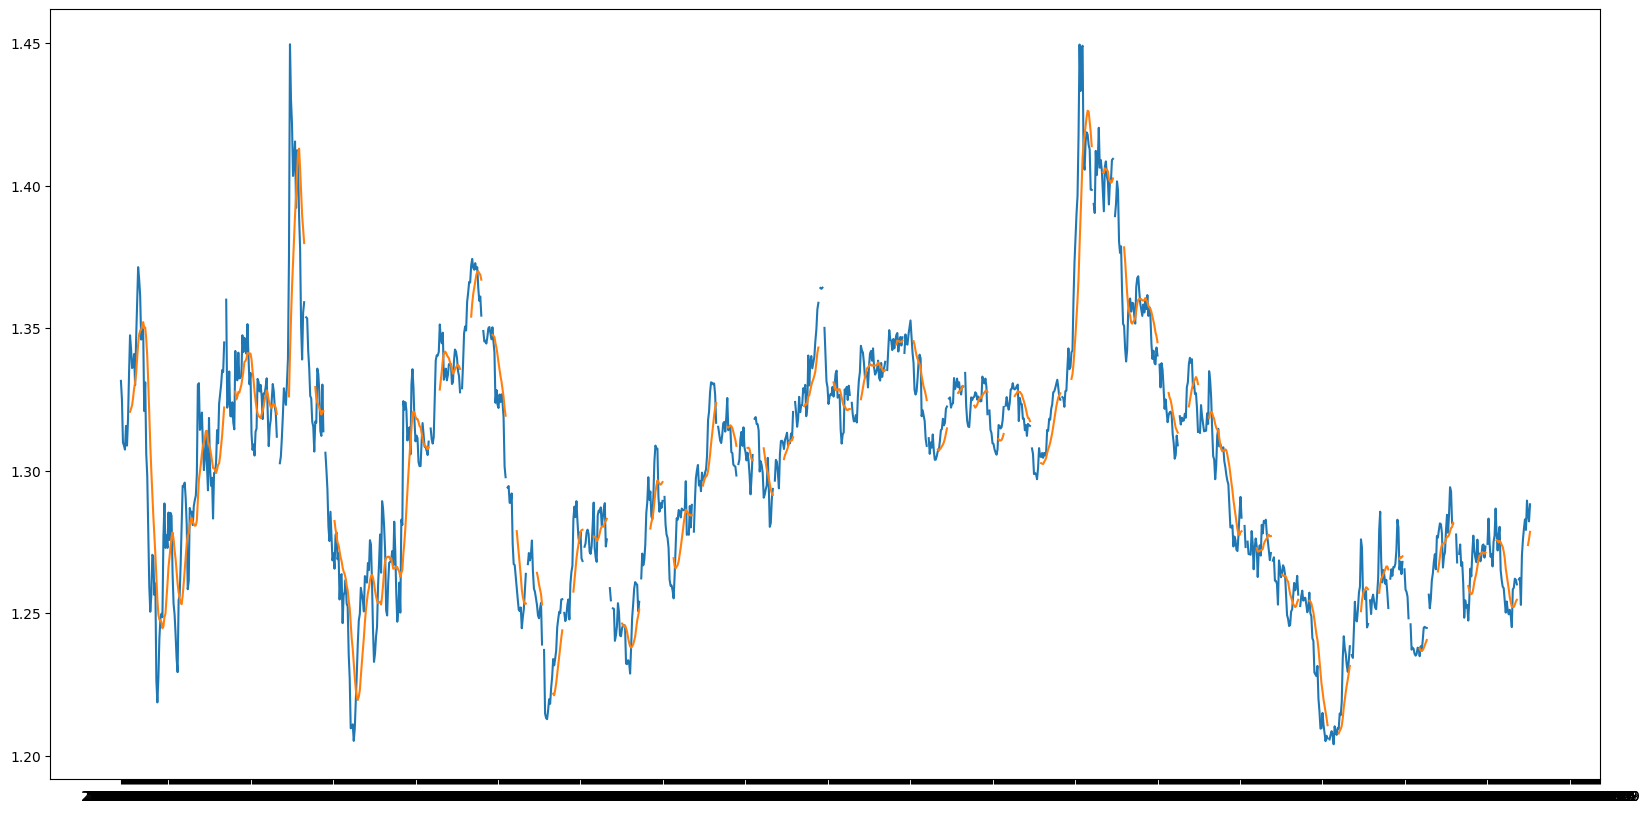

In [24]:
df["rolling_avg"] = df["label"].rolling(10).mean()
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df[['label', 'rolling_avg']])
plt.show()
# df[['label', 'rolling_avg']].plot(figsize=(12, 8), lw=2)

In [29]:
start_date = "2017-01-01"
end_date = "2017-12-31"
df["predict"] = results.predict(start=start_date, end=end_date)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
df[['label','rolling_av','predict']].plot(lw=2);

KeyError: "['rolling_av', 'predict'] not in index"